In [1]:
import json
from sdf import *
from render import *
from models import *

In [7]:
model = Net3()
#model = torch.load("model-snapshot.pt")
model.load_state_dict(torch.load("model-snapshot.pt"))

<All keys matched successfully>

{'ray_casts': 11109735, 'hits': tensor(617), 'time': 6.629018068313599}


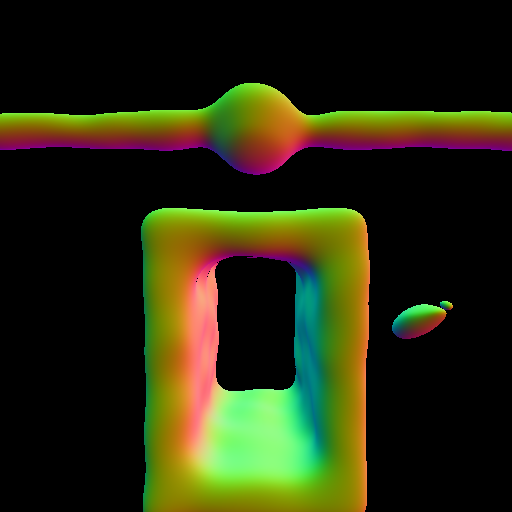

In [8]:

with torch.no_grad():
    image, stats = raymarch(model, torch.Tensor([0, .5, -2]), as_pil=True, size=512)
print(stats)
image

{'ray_casts': 5090762, 'hits': tensor(0), 'time': 0.6366498470306396}


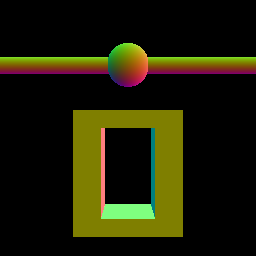

In [4]:
def sdf_box(pos: torch.Tensor, radius: Union[float, torch.Tensor]) -> torch.Tensor:
    q = torch.abs(pos) - radius
    return (
        length(torch.clamp_min(q, 0))
        + torch.clamp_max(torch.max(q, dim=-1, keepdim=True).values.reshape(-1), 0)
    )

#def sdf_difference(a: torch.Tensor, b: torch.Tensor) -> torch.Tensor:
#    return torch.maximum(a, -b)

def sdf_scene(pos: torch.Tensor) -> torch.Tensor:
    #d = sdf_sphere(pos, 1)
    #d = sdf_box(pos - torch.Tensor([-.6, 0, 0]), torch.Tensor([.2, .7, .5]))
    d = sdf_difference(
        sdf_box(pos, torch.Tensor([0.6, .7, .2])),
        sdf_box(pos, torch.Tensor([0.3, .5, .3]))
    )
    d = torch.minimum(d, sdf_sphere(pos - torch.Tensor([0,1.25,0]), .25))
    #d = sdf_tube(pos, .5, 1)
    d = torch.minimum(d, sdf_tube(pos - torch.Tensor([0,1.25,0]), .1, 0))
    return d

image, stats = raymarch(sdf_scene, torch.Tensor([0, .5, -2]), as_pil=True, size=256)
print(stats)
image

In [12]:

#model.state_dict()